In [1]:
import numpy as np
import fiducial as fid
import matplotlib.pyplot as plt
import utils as u
import datavectors_from_sims as dv

In [19]:
lens = 'DESI'
src = 'LSST'
rp0 = 1.5
Pimax=400.
#rp_bin_edges = np.logspace(np.log10(rp0), np.log10(90.), 16)
#rp_bin_c = u.rp_bins_mid(rp_bin_edges)
endfilename='test_upsgg'
h=0.69
OmB = 0.022/h**2
b1 = 2.03
b2 = 0.9*(b1-1.0)**2-0.5 # From Fast-PT example notebook which says 
#'(this is a numerical fit to simulation k2Pnl1_regdata, but a relationship of this form is motivated in the spherical collapse picture'
bs = -4.0/7.0*(b1-1.0) # The 'coevolution value' see Pandey et al. DES Y3 papers

params = {'mu_0': 0., 'sigma_0':0., 'OmB':OmB, 'h':h, 'n_s':0.965, 'sigma8':0.82,'b':b1, 'OmM': 0.292, 'b_2':b2, 'b_s': bs} 

#Nsamps=100000

print('b2=', b2)
print('bs=', bs)

b2= 0.4548099999999996
bs= -0.5885714285714284


In [20]:
# Units

mperMpc = 3.0856776*10**22
Msun = 1.989*10**30 # in kg
Gnewt = 6.67408*10**(-11) # kg^{-1}m^3 s^{-2}
c=2.99792458*10**(8) # m / s
rho_crit = 3. * 10**10 * mperMpc / (8. * np.pi * Gnewt * Msun) / 10**12  
# rho crit in Msol h^2 / Mpc / pc^2, to yield Upsilon_gg in Msol h / pc^2

OmegaM = params['OmM']

In [21]:
# Now get the means of these quantities from Shadab's sims:

In [22]:
Upgg_pack = dv.get_mean_datavec(stat=['gg'],rmin=1.5,data_dir='../data_for_Danielle/')

rp shape= (16,)
means= (16,)


In [23]:
rp_sim = Upgg_pack[:,0]; Upgg_sim = Upgg_pack[:,1]

In [24]:
# Get stuff in my units
Upgg_sim_myUnits= rho_crit*Upgg_sim #Msol h / pc^2

In [25]:
Upgm_pack = dv.get_mean_datavec(stat=['gm'],rmin=1.5,data_dir='../data_for_Danielle/')

rp shape= (16,)
means= (16,)


In [26]:
rp_sim_gm = Upgm_pack[:,0]; Upgm_sim = Upgm_pack[:,1]

In [27]:
# Get stuff in my units
Upgm_sim_myUnits= OmegaM*rho_crit*Upgm_sim #Msol h / pc^2

In [28]:
beta = dv.get_mean_datavec(stat=['beta'],rmin=1.5,data_dir='../data_for_Danielle/')

In [29]:
#print(rp_sim)
print(rp_sim_gm)

[ 1.39357881  1.83709466  2.42176242  3.19250463  4.20854074  5.54793718  7.31360558  9.64120984 12.70958983 16.75450244 22.08673575 29.11598823 38.38234769 50.59778848 66.70087562 87.92887875]


In [30]:
rp_edges = u.rp_bin_edges_log(rp_sim_gm)
print(len(rp_edges))

17


In [31]:
rp_edges_rp0 = np.logspace(np.log10(rp0), np.log10(rp_edges[-1]), 17)
print(rp_edges_rp0)

[  1.5          1.95138866   2.5386118    3.30254551   4.29636656   5.58925399   7.27120456   9.4592974   12.30584377  16.0089893   20.82650676  27.09373938  35.24694381  45.85365757  59.65220486  77.60309064 100.95586057]


In [32]:
# Gets the datavector from theory in the order of Upgm, Upgg, beta
data_lin_jp = fid.jp_datavector(params, rp_edges_rp0, rp0, lens,src, Pimax, endfilename, nonlin = False)

Upgm_mine_lin = data_lin_jp[0:16]
Upgg_mine_lin = data_lin_jp[16:32]
beta_mine_lin = data_lin_jp[32]

index_rp= [0, 51, 101, 152, 202, 253, 303, 354, 404, 455, 505, 556, 606, 657, 707, 758, 808, 859, 909, 960, 1010, 1061, 1111, 1162, 1212, 1263, 1313, 1364, 1414, 1465, 1515, 1566, 1616, 1667, 1717, 1768, 1818, 1869, 1919, 1970, 2020, 2071, 2121, 2172, 2222, 2273, 2323, 2374, 2424, 2475, 2525, 2576, 2626, 2677, 2727, 2778, 2828, 2879, 2929, 2980, 3030, 3081, 3131, 3182, 3232, 3283, 3333, 3384, 3434, 3485, 3535, 3586, 3636, 3687, 3737, 3788, 3838, 3889, 3939, 3990, 4040, 4091, 4141, 4192, 4242, 4293, 4343, 4394, 4444, 4495, 4545, 4596, 4646, 4697, 4747, 4798, 4848, 4899, 4949, 4999]
rp finer at index rp= [  1.5          1.56581699   1.63314618   1.70480535   1.77811096   1.8561309    1.93594342   2.02088872   2.10778573   2.20027113   2.29488148   2.39557626   2.49858461   2.60821748   2.72036928   2.83973361   2.96184046   3.09180007
   3.22474562   3.36624098   3.51098733   3.6650424    3.82263703   3.99036666   4.16195004   4.34456805   4.53138188   4.73020981   4.933606     5.1500827

In [33]:
EG_lin = data_lin_EG = fid.E_G(params, rp_edges_rp0, rp0, lens, src, Pimax, endfilename, nonlin = False, nl_bias = False)

index_rp= [0, 51, 101, 152, 202, 253, 303, 354, 404, 455, 505, 556, 606, 657, 707, 758, 808, 859, 909, 960, 1010, 1061, 1111, 1162, 1212, 1263, 1313, 1364, 1414, 1465, 1515, 1566, 1616, 1667, 1717, 1768, 1818, 1869, 1919, 1970, 2020, 2071, 2121, 2172, 2222, 2273, 2323, 2374, 2424, 2475, 2525, 2576, 2626, 2677, 2727, 2778, 2828, 2879, 2929, 2980, 3030, 3081, 3131, 3182, 3232, 3283, 3333, 3384, 3434, 3485, 3535, 3586, 3636, 3687, 3737, 3788, 3838, 3889, 3939, 3990, 4040, 4091, 4141, 4192, 4242, 4293, 4343, 4394, 4444, 4495, 4545, 4596, 4646, 4697, 4747, 4798, 4848, 4899, 4949, 4999]
rp finer at index rp= [  1.5          1.56581699   1.63314618   1.70480535   1.77811096   1.8561309    1.93594342   2.02088872   2.10778573   2.20027113   2.29488148   2.39557626   2.49858461   2.60821748   2.72036928   2.83973361   2.96184046   3.09180007
   3.22474562   3.36624098   3.51098733   3.6650424    3.82263703   3.99036666   4.16195004   4.34456805   4.53138188   4.73020981   4.933606     5.1500827

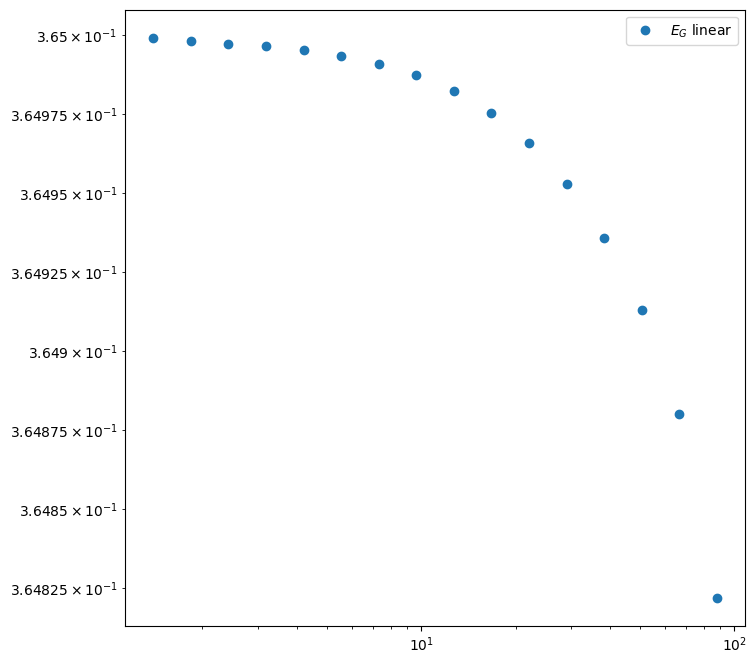

In [35]:
plt.figure(figsize=[8,8])
plt.loglog(rp_sim_gm, EG_lin, 'o', label='$E_G$ linear')
#plt.semilogx(rp_sim_gm, np.abs(ratio-fid_val)/fid_val, 'o', label='ratio frac diff from fid, lin')
#plt.loglog(rp_sim_gm, Upgg_mine_lin, 'o', label='Upgg, me, lin')
plt.legend()
plt.show()

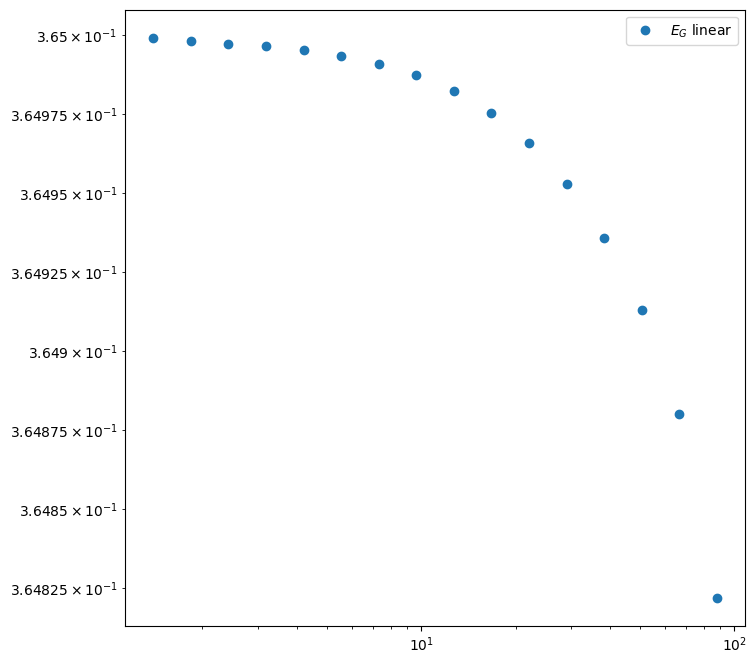

In [36]:
#plt.figure(figsize=[8,8])
#plt.loglog(rp_sim_gm, Upgm_sim_myUnits, 'o', label='Upgm, sim')
#plt.loglog(rp_sim_gm, Upgm_mine_lin, 'o', label='Upgm, me, lin')
#plt.loglog(rp_sim_gm, Upgg_mine_lin, 'o', label='Upgg, me, lin')
#plt.legend()
#plt.show()

ratio = (Upgm_mine_lin)/Upgg_mine_lin
fid_val = 0.14383

#plt.figure(figsize=[8,8])
#plt.loglog(rp_sim_gm, Upgm_sim_myUnits, 'o', label='Upgm, sim')
#plt.semilogx(rp_sim_gm, np.abs(ratio-fid_val)/fid_val, 'o', label='ratio frac diff from fid, lin')
#plt.loglog(rp_sim_gm, Upgg_mine_lin, 'o', label='Upgg, me, lin')
#plt.legend()
#plt.show()

#print((Upgm_mine_lin)/Upgg_mine_lin)

plt.figure(figsize=[8,8])
plt.loglog(rp_sim_gm, Upgm_mine_lin/(Upgg_mine_lin*beta_mine_lin), 'o', label='$E_G$ linear')
#plt.semilogx(rp_sim_gm, np.abs(ratio-fid_val)/fid_val, 'o', label='ratio frac diff from fid, lin')
#plt.loglog(rp_sim_gm, Upgg_mine_lin, 'o', label='Upgg, me, lin')
plt.legend()
plt.show()

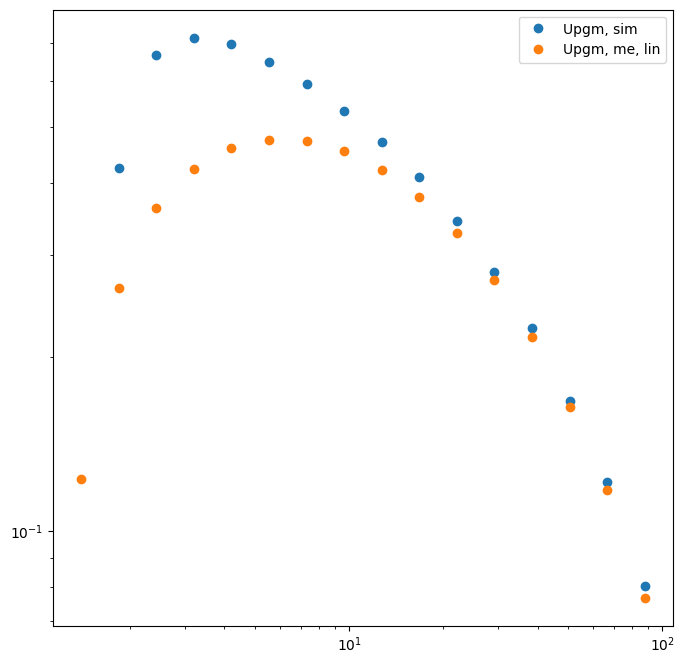

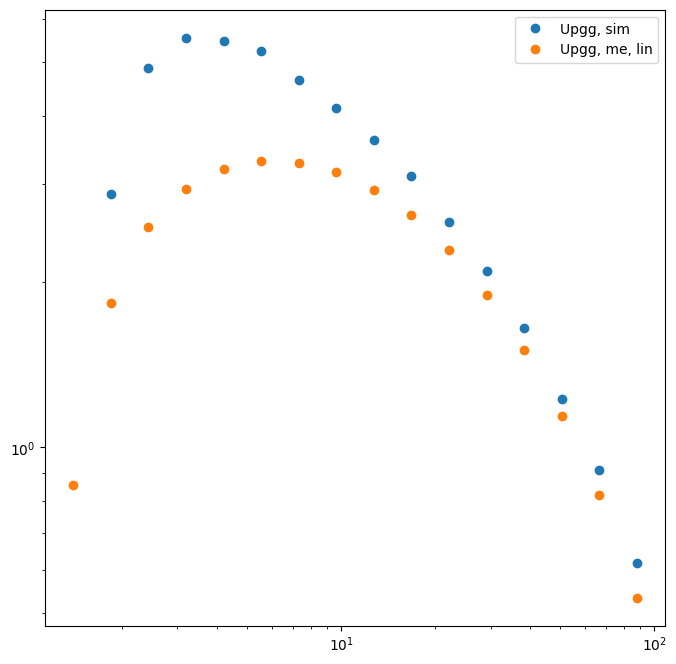

In [37]:
plt.figure(figsize=[8,8])
plt.loglog(rp_sim_gm, Upgm_sim_myUnits, 'o', label='Upgm, sim')
plt.loglog(rp_sim_gm, Upgm_mine_lin, 'o', label='Upgm, me, lin')
#plt.loglog(rp_sim_gm, Upgg_mine_lin, 'o', label='Upgg, me, lin')
plt.legend()
plt.show()

plt.figure(figsize=[8,8])
plt.loglog(rp_sim_gm, Upgg_sim_myUnits, 'o', label='Upgg, sim')
plt.loglog(rp_sim_gm, Upgg_mine_lin, 'o', label='Upgg, me, lin')
#plt.loglog(rp_sim_gm, Upgg_mine_lin, 'o', label='Upgg, me, lin')
plt.legend()
plt.show()

In [31]:
# Gets the datavector from theory in the order of Upgm, Upgg, beta
data_nl_jp_linbias = fid.jp_datavector(params, rp_edges, rp0, lens,src, Pimax, endfilename, nonlin = True)

Upgm_mine_linbias = data_nl_jp_linbias[0:16]
Upgg_mine_linbias = data_nl_jp_linbias[16:32]
beta_mine_linbias = data_nl_jp_linbias[32]

maxchi= 6669.353003473356


In [ ]:
# Gets the datavector from theory in the order of Upgm, Upgg, beta - nonlinear bias
data_nl_jp_nlbias = fid.jp_datavector(params, rp_edges, rp0, lens,src, Pimax, endfilename, nonlin = True, nl_bias = True)

Upgm_mine_nlbias = data_nl_jp_nlbias[0:16]
Upgg_mine_nlbias = data_nl_jp_nlbias[16:32]
beta_mine_nlbias = data_nl_jp_nlbias[32]

In [ ]:
k_nlmat, Pkgg_nlmat = np.loadtxt('../txtfiles/Pkgg_nonlin_matter=True.dat', unpack=True)
k_nlb, Pkgg_nlb = np.loadtxt('../txtfiles/Pkgg_nonlinbias.txt', unpack=True)
k_nlb, Pkmm_nlb = np.loadtxt('../txtfiles/Pkmm_PT.txt', unpack=True)

In [ ]:
plt.figure(figsize=[8,8])
plt.loglog(k_nlmat, Pkgg_nlmat, label='nonlin matter, gg')
plt.loglog(k_nlb, Pkmm_nlb, label='nonlin matterPT lin bias')
plt.loglog(k_nlb, Pkgg_nlb, label='nonlin gg PT lin bias')
plt.xlim(10**(-4),10**2)
plt.legend()
plt.show()

In [ ]:
# Compare:

In [ ]:
plt.figure(figsize=[8,8])
#plt.loglog(rp_sim_gm, Upgm_sim_myUnits, 'o', label='Upgm, sim')
plt.loglog(rp_sim_gm, Upgm_mine_linbias, 'o', label='Upgm, me, linbias')
plt.loglog(rp_sim_gm, Upgm_mine_nlbias, 'o', label='Upgm, me, NLbias')
plt.legend()
plt.show()

#plt.figure(figsize=[8,8])
#plt.semilogx(rp_sim_gm, Upgm_sim_myUnits / Upgm_mine, 'o', label='Upgm, sim / me')
#plt.ylim(0.8, 1.2)
#plt.legend()
#plt.show()

print(Upgm_mine_nlbias)

In [ ]:
print(Upgm_sim)

In [ ]:
plt.figure(figsize=[8,8])
#plt.loglog(rp_sim, Upgg_sim_myUnits, 'o', label='Upgg, sim')
plt.loglog(rp_sim, Upgg_mine_linbias, 'o', label='Upgg, me, linbias')
plt.loglog(rp_sim, Upgg_mine_nlbias, 'o', label='Upgg, me, NLbias')
plt.legend()
plt.show()

#plt.figure(figsize=[8,8])
#plt.semilogx(rp_sim, Upgg_sim_myUnits / Upgg_mine, 'o', label='Upgg, sim / me')
#plt.ylim(0.8, 1.4)
#plt.legend()
#plt.show()

In [ ]:
print('beta sim=', beta)
print('beta mine=', beta_mine)
print('beta frac diff=', np.abs(beta-beta_mine)/np.abs(beta_mine))